# Sınıflandırma Problemleri

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets


from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
veriler = pd.read_csv("../Docs/veriler.csv")

# Bağımsız değişkenler
x = veriler.iloc[:,1:4].values
# Bağımlı değişken
y = veriler.iloc[:,4:].values

In [4]:
# Verilerin eğitim ve test için bölünmesi

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [5]:
# Verilerin ölçeklenmesi

sc=StandardScaler()

# Fit = eğitme, transform = uygulama
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

## Lojistik Regresyon Fonksiyonu

${\displaystyle \sigma (t) = {\frac {e^t}{e^t + 1}} = {\frac {1}{1 + e^{-t}}}}$
<br><br>
${\displaystyle t = \beta_0 + \beta_ x}$
<br>
${\displaystyle t = A + Bx}$
<br>
${\displaystyle p(x) = {\frac {1}{ + e^{-(\beta_0 + \beta_1 x)}}}}$
<br><br>
${\displaystyle \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_m x_m = \beta_0 + {\sum_{i=1}^m}\beta_i x_i}$

In [12]:
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)
print("LOGR\n")
print(y_pred)
print("***")
print(y_test)

LOGR

['e' 'e' 'e' 'e' 'k' 'e' 'e' 'e']
***
[['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']]


In [13]:
?logr

Type:        LogisticRegression
String form: LogisticRegression(random_state=0)
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\linear_model\_logistic.py
Docstring:  
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solve

# Karmaşıklık Matrisi

**C1 kanserdir, C2 kanser değildir olacak şekilde**

|  | **C1** | **C2** |
| --- | --- | --- |
| **C1** | True positive | False negative |
| **C2** | False positive | True negative |

**Bu örnekte sütunlar gerçek değerler, satırlar tahmin değerleridir**

<br>
<hr>

| classes | buy_computer = yes | buy_computer = no | total | recognition (%) |
| --- | --- | --- | --- | --- |
| **buy_computer = yes** | 6954 | 46 | 7000 | 99.34 |
| **buy_computer = no** | 412 | 2588 | 3000 | 86.27 |
| **total** | 7366 | 2634 | 10000 | 95.52 |

<br>

* Accuracy M, acc(m): model m için yüde kaç doğru sınıflandırma olduğudur
    * Error date (missclassification rate) = 1- acc(M)
    * Alternatif ölçümler (e.g., for cancer diagnosis)
    
    sensitivity = t-pos/(t-pos + f-neg), true positive recognition rate
    <br>
    specifity = t-neg/(t-neg + f-pos), true negative recognition rate
    <br>
    precision = t-pos/(t-pos + f-pos)
    <br>
    accuracy = sensitivity * pos/(pos + neg) + specifity * neg/(pos + neg)

In [14]:
# Karmaşıklık Matrisi

cm = confusion_matrix(y_test,y_pred)
print("CM")
print(cm)

CM
[[0 1]
 [7 0]]


In [15]:
?cm

Type:        ndarray
String form:
[[0 1]
 [7 0]]
Length:      2
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\numpy\__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : data

# KNN K-En Yakın Komşu (K-Nearest Neighbors Regression)

In [16]:
# KNN algoritması

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print("KNN")
print(cm)

KNN
[[1 0]
 [1 6]]


In [17]:
?knn

Type:        KNeighborsClassifier
String form: KNeighborsClassifier(n_neighbors=1)
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\neighbors\_classification.py
Docstring:  
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
     

# Destek Vektör Regresyonu (Support Vector Regression)

In [18]:
# Destek Vektör Regresyonu

svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)

SVC
[[1 0]
 [7 0]]


In [19]:
?svc

Type:        SVC
String form: SVC(kernel='poly')
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\svm\_classes.py
Docstring:  
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

Read more in the :ref:`User Guide <svm_classification>`.

Parameters
----------
C : float, default=1.0
    Regularization paramet

# Destek Vektör Makineleri Çekirdek Hilesi (Support Vector Machines Kernel Trick) 

Üçüncü bir boyut elde ederek uzaklıkları hesaplamak için kullanılır
<br><br>
${\displaystyle g_i(x_j) = exp ({\frac {-||x_j - \mu_i||^2}{2 \sigma_i^2}})}$

In [20]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC Kernel Trick')
print(cm)

SVC Kernel Trick
[[1 0]
 [5 2]]


# Naif Bayes (Koşullu Olasılık)

${\displaystyle P(A|B) = {\frac {P(A \cap B)}{P(B)}}}$

## Bayes Teoremi

${\displaystyle P(C_i|X) = {\frac {P(X|C_i)P(C_i)}{P(X)}}}$
<br>

**Bernoulli**
<br>
${\displaystyle P(x_i|y) = P(i|y)x_i + (1 - P(i|y))(1 - x_i)}$
<br><br>

**Multinomial**
<br>
${\displaystyle \hat\theta_{yi} = {\frac {N_{yi} + \alpha}{N_y + \alpha n}}}$
<br><br>

**Gaussian**
<br>
${\displaystyle P(x_i|y) = {\frac {1}{\sqrt {2 \pi \sigma_y^2}}exp(-{\frac {(x_i - \mu_y)^2}{2 \sigma_y^2}})}}$

In [21]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print("GNB")
print(cm)

GNB
[[0 1]
 [6 1]]


In [22]:
?gnb

Type:        GaussianNB
String form: GaussianNB()
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\naive_bayes.py
Docstring:  
Gaussian Naive Bayes (GaussianNB).

Can perform online updates to model parameters via :meth:`partial_fit`.
For details on algorithm used to update feature means and variance online,
see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:

    http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

Read more in the :ref:`User Guide <gaussian_naive_bayes>`.

Parameters
----------
priors : array-like of shape (n_classes,)
    Prior probabilities of the classes. If specified the priors are not
    adjusted according to the data.

var_smoothing : float, default=1e-9
    Portion of the largest variance of all features that is added to
    variances for calculation stability.

    .. versionadded:: 0.20

Attributes
----------
class_count_ : ndarray of shape (n_classes,)
    number of training 

# Karar Ağaçları İle Sınıflandırma (Decision Tree Classifier)

## Information Gain (Enformasyon Kazanımı) ID3

${\displaystyle Info(D) = -{\sum_{i=1}^m}p_i log_2(p_i)}$
<br><br>
${\displaystyle Info_A(D) = {\sum_{j=1}^v}{\frac {|D_j|}{|D|}}xI(D_j)}$
<br><br>
${\displaystyle Gain(A) = Info(D) - Info_A(D)}$

In [23]:
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print("DTC")
print(cm)

DTC
[[1 0]
 [1 6]]


In [24]:
?dtc

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier(criterion='entropy')
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples r

# Rassal Ağaçlar (Random Forest)

In [8]:
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("RFC")
print(cm)

RFC
[[1 0]
 [2 5]]


In [26]:
?rfc

Type:        RandomForestClassifier
String form: RandomForestClassifier(criterion='entropy', n_estimators=10)
Length:      10
File:        c:\users\tolga\appdata\local\programs\python\python310\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Support

# Teori Özeti

| **Model** | **Avantajları** | **Dezavantajları** |
| --- | --- | --- |
| **Lojistik Regresyon** | Olasılıksal yaklaşım, özelliklerin istatistiksel önemi hakkında bilgi verir | Lojistik Regresyon Varsayımları |
| **K-NN** | Anlaması basit, hızlı ve verimli | Komşuların k sayısını doğru seçmek gerekir |
| **SVM** | Sonuca ulaşma performansı iyi, aykırı değerler hakkında önyargılı değil, aşırı öğrenmeye (overfittting) duyarlı değildir | Doğrusal olmayan problemler için uygun değildir, yüksek değerdeki özellikler için en iyi seçenek değildir |
| **Kernel SVM** | Doğrusal olmayan problemlerde yüksek performanslıdır, aykırı değerler hakkında hassas değil, aşırı öğrenmeye (overfitting) duyarlı değildir | Yüksek değerdeki özellikler için en iyi seçenek değil, daha karmaşık |
| **Naive Bayes** | Verimli, aykırı değerler hakkında önyargılı değil, doğrusal olmayan problemler üzerinde çalışır, olasılıksal yaklaşımdır | Özelliklerin aynı istatistiksel anlamlılığa sahip olduğu varsayımına dayanır |
| **Karar Ağacı Sınıflandırması** | Yorumlama, özellik ölçeklendirmesine gerek yoktur, hem doğrusal hem de doğrusal olmayan problemler üzerinde çalışır | Çok küçük veri kümeleri üzerinde zayıf sonuçlar, aşırı öğrenme (overfitting) kolaylıkla gerçekleşebilir |



<br><br><hr><br><br>

| n = 165 | **Predicted: No** | **Predicted: Yes** | **Total** |
| --- | --- | --- | --- |
| **Actual: No** | TN = 50 | FP = 10 | 60 |
| **Actual: Yes** | FN = 5 | TP = 100 | 105 |
| **Total** | 55 | 110 | **165** |

<br>

* **Accuracy:** Kaç doğru sınıflandırma var?
    * (TP/TN)/Total = (100+50)/165 = **0.91**
* **Missclassification Rate:** Kaç yanlış sınıflandırma yapılmıştır?
    * (FP+FN)/Total = (10+5)/165 = **0.09**
    * = 1 - Accuracy
    * "Error Rate" olarak da geçer
* **True Positive Rate:** Gerçekte Yes ise kaçı doğru sınıflanmıştır?
    * (TP)/(Actual: Yes) = 100/105 = **0.95**
    * Aynı zamanda "Sensitivity" veya "Reall" da denir
* **False Positive Rate:** Tahmin No ise bu sonuçların kaçı doğru sınıflanmıştır?
    * (FP)/(Actual: No) = 10/60 = **0.17**
* **Specifity:** Gerçekte No ise bu sonuçların kaçı doğru sınıflanmıştır?
    * (TN)/(Actual: No) = 50/60 = **0.83**
    * 1 - (False Positive Rate) olrak da hesaplanır
* **Precision:** Tahmin Yes ise kaçı doğru sınıflandırılmıştır?
    * (TP)/(Predicted: Yes) = 100/110 = **0.91**
* **Prevalence:** Gerçekte Yes dağılım oranı kaçtır?
    * (Actual: Yes)/(Total) = 105/165 = **0.64**
    
# Değerlendirme

|  |  |
| --- | --- |
| Sensitivity - True Positive Rate | ${\displaystyle {\frac {TP}{P}} = {\frac {TP}{TP+FN}}}$ |
| Specificity - True Negative Rate | ${\displaystyle {\frac {TN}{N}} = {\frac {TN}{TN+FP}}}$ |
| Precision - Positive Predicted Value | ${\displaystyle {\frac {TP}{TP+FP}}}$ |
| Negative Predicted Value | ${\displaystyle {\frac {TN}{TN+FN}}}$ |
| Fall-out - False Positive Rate | ${\displaystyle {\frac {FP}{N}} = {\frac {FP}{TN+FP}}}$ |
| False Discovery Rate | ${\displaystyle {\frac {FP}{TP+FP}}}$ |
| Miss Rate - False Negative Rate | ${\displaystyle {\frac {FN}{P}} = {\frac {FN}{TP+FN}}}$ |
| Accuracy | ${\displaystyle {\frac {TP+TN}{Total}}}$ |
| F1 Score | ${\displaystyle {\frac {2TP}{2TP+FP+FN}}}$ |

# ROC Eğrisi (Receiver Operating Characteristic)

* True Positive Rate
* False Positive Rate

# Sınıflandırma Şablonu

In [10]:
# ROC - TPR, FPR değerleri 

y_proba = rfc.predict_proba(X_test)
print(f"y_test: {y_test}")
print(f"y_proba[:,0] : {y_proba[:,0]}")

fpr , tpr , thold = metrics.roc_curve(y_test,y_proba[:,0],pos_label='e')
print(f"fpr: {fpr}")
print(f"tpr: {tpr}")

y_test: [['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']]
y_proba[:,0] : [0.5 0.2 0.2 0.2 0.5 0.2 0.2 0.5]
fpr: [0.         0.28571429 1.        ]
tpr: [0. 1. 1.]


In [15]:
?metrics.roc_curve

Signature:
metrics.roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC).

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------
y_true : ndarray of shape (n_samples,)
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : ndarray of shape (n_samples,)
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
    ``pos_label`` is set to 1, otherwise an error will be raised.

sample_weight : array-like of shape (n_samples,)

# Ödev

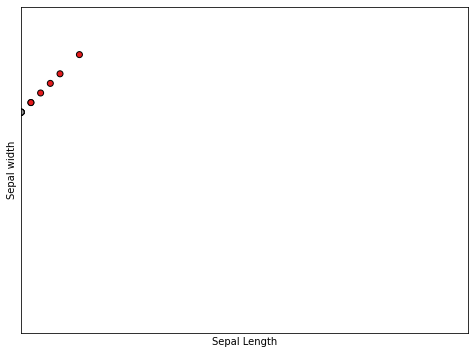

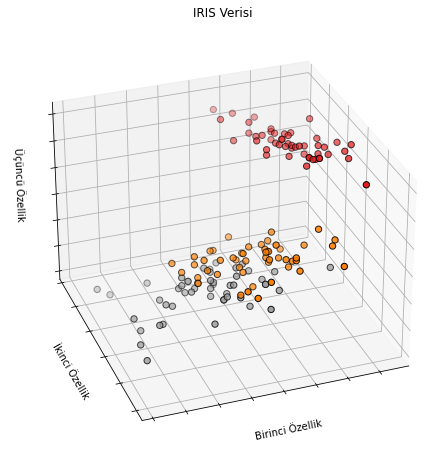

In [34]:
iris = datasets.load_iris()
X = iris.data[:, :2] # 2 boyutlu veri
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8,6))
plt.clf()

# Eğitim verilerini çizme
plt.scatter(x[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1, edgecolor = "k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev = -150, azim = 110)
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c = y, cmap = plt.cm.Set1, edgecolor = "k", s = 40)
ax.set_title("IRIS Verisi")
ax.set_xlabel("Birinci Özellik")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("İkinci Özellik")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Üçüncü Özellik")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [25]:
veriler = pd.read_excel("../Docs/iris.xls")

# Bağımsız değişkenler
x = veriler.iloc[:,1:4].values
# Bağımlı dğeişken
y = veriler.iloc[:,4:].values


# Verilerin eğitim ve test için bölünmesi

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)


# Verilerin ölçeklenmesi

sc=StandardScaler()

# Fit = eğitme, transform = uygulama
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [26]:
# Lojistik Regresyon

logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)
print("LOGR\n")
print(y_pred)
print("***")
print(y_test)


# Karmaşıklık Matrisi

cm = confusion_matrix(y_test,y_pred)
print("CM")
print(cm)


# KNN algoritması

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print("KNN")
print(cm)


# Destek Vektör Regresyonu

svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)


svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC Kernel Trick')
print(cm)


# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print("GNB")
print(cm)


# Karar Ağaçları
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print("DTC")
print(cm)


# Random Forest
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("RFC")
print(cm)


# ROC - TPR, FPR değerleri 

y_proba = rfc.predict_proba(X_test)
print(f"y_test: {y_test}")
print(f"y_proba[:,0] : {y_proba[:,0]}")

fpr , tpr , thold = metrics.roc_curve(y_test,y_proba[:,0],pos_label='e')
print(f"fpr: {fpr}")
print(f"tpr: {tpr}")

LOGR

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica']
***
[['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-versicolor']
 

In [ ]:
y_g